# ML-Lecture 3.2

#### Short Discussion on Active Listening

1. Pay Attention
2. Show that you are listening
3. Provide feedback
4. Defer Judgement
5. Respond Appropriately

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

# or wherever you have saved the repo
sys.path.append('/Users/tlee010/Desktop/github_repos/fastai/')

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

### Load in data from last lesson - from feather

In [4]:
import feather
df_raw = feather.read_dataframe('/tmp/raw')
print('import complete')

import complete


### Load in our data from last lesson


In [5]:
# loading the data (large)
# %time df_raw = pd.read_csv('/Users/tlee010/kaggle/bulldozers/Train.csv', low_memory=False, parse_dates=["saledate"])
# print('load complete')

In [6]:
set_plot_sizes(12,14,16)

In [7]:
??set_plot_sizes

```python
def set_plot_sizes(sml, med, big):
    plt.rc('font', size=sml)          # controls default text sizes
    plt.rc('axes', titlesize=sml)     # fontsize of the axes title
    plt.rc('axes', labelsize=med)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('legend', fontsize=sml)    # legend fontsize
    plt.rc('figure', titlesize=big)  # fontsize of the figure title
File:      ~/Desktop/github_repos/fastai/fastai/structured.py
```

### Break the data from last lesson into Train and Test

In [9]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice')

def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

# Interpret your data better

- How look at the machine learning models to gain insight or learn about the data.
- How to look at larger datasets

#### Q: Is there any intuition on when to apply the random forest model?
- A: the answer is rephrase "in what situation would i try other models" - unstructured data, images, sound files, then try deep learning. Similarly special cases may align better with Collaborative filtering which is a different model.

## Large Dataset Considerations  - Example Grocery Kaggle

This is what we call a relational dataset. This is what we call a start schema. It's called a star schema, because it is in the middle with other tables connecting to it (outside). There's also a snowflake design which has additional branches on the edges. 

There's a central transactions dataset. In this case it tracks what was sold, who bought it, and what they bought.

In this case, when we run it, the file is HUGE 5GB. 

We will use `%time ` and `%%time` in the jupyter notebook blocks to time some of the longer processes

#### Rule 1: don't load in the entire dataset the first time. Use Shuf to start and sample

- Use pandas to help decide the datatypes needed

#### Set the Path

In [10]:
path = '/Users/tlee010/kaggle/grocery/train.csv'

In [7]:
 types = {'id':'int64',
             'item_nbr':'int32',
             'store_nbr':'float32',
             'onpromotion':'object',
            }

In [9]:
%%time
import pandas as pd
df_all = pd.read_csv(path, parse_dates= ['date'], dtype = types, infer_datetime_format=True)

CPU times: user 2min 26s, sys: 21.6 s, total: 2min 47s
Wall time: 2min 50s


# Removed Grocery Kaggle code + notes due to active competition

#### Place Holder - make Random Forest models and evaluate

### Random Forest

Can only do binary divisions. It's ability to understand locations and other meta data is limited. There's a kaggle kernel, take the last two weeks, take the average sales by date, item number and  on promotion submit. If you submit that you get 30th.

Your job is how do you start with that model and make it a little bit better?

- How can you make some additional features?
- The coding you do for machine learning is really frustrating

### For reference: Rossman Store Sales

1st place
http://blog.kaggle.com/2015/12/21/rossmann-store-sales-winners-interview-1st-place-gert/

3rd place
http://blog.kaggle.com/2016/01/22/rossmann-store-sales-winners-interview-3rd-place-cheng-gui/

## 1. Random Forests

In [41]:
import feather
df_raw = feather.read_dataframe('/tmp/raw')
print('import complete')

import complete


In [43]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice')

In [44]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [45]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [48]:
df_raw.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600


#### Mean vs. Std. for predictions
We already know how to get predictions. We take the average value in each leaf node to get the prediction. But normally we dont want just a prediction we also want an interval.

If we have seen that many rows much like a new data set. Then we won't have path through the tree for a specifically new row, it will end up in weird places.

What if instead of mean, we took the standard deviation per node. If its a common row, the tree will learn to make a good predictions. The standard deviations of the predictions of the trees. Gives us relative understanding of how confident we are of this prediction.

That is not something that exists in scikit learn. So we will create it.

# Confidence based on tree variance

We don't need a massively large dataset for random forest. We just need enough to have consistent examples that gives an indicator if we are on the right track. 

In [49]:
set_rf_samples(50000)

## 40 Estimators (Trees)

In [50]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20586503432923145, 0.24932815554452017, 0.91142727542837831, 0.8889827098012647, 0.89436793611776322]


#### From last time, go through each tree and stack predictions. 

Then we show how to calculate the mean and how to calculate the std.


In [52]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.33 s, sys: 8.62 ms, total: 1.34 s
Wall time: 1.34 s


(9.2300841617140215, 0.26126856453842179)


#### List comprehensions - runs single thread (doesn't take advantage of multi-core processes

fastai provides a handy function called parallel trees that uses multi threaded support from sklearn

In [53]:
??parallel_trees

```python
def parallel_trees(m, fn, n_jobs=8):
        return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))
```

In [56]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))

# mean , std
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 66.7 ms, sys: 72 ms, total: 139 ms
Wall time: 430 ms


(9.2300841617140215, 0.26126856453842179)

### Ref: Pandas Plotting 

https://pandas.pydata.org/pandas-docs/stable/visualization.html

<img src='https://pandas.pydata.org/pandas-docs/stable/_images/series_plot_basic.png' style='width:200px'/>

<img src='https://pandas.pydata.org/pandas-docs/stable/_images/bar_plot_ex.png' style='width:200px'/>


#### Looking at Enclosure as an important feature

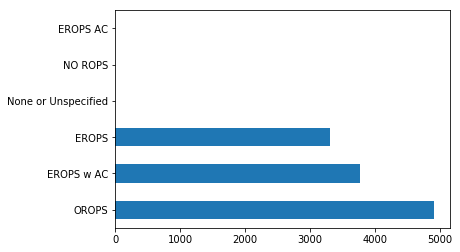

In [57]:
x = raw_valid.copy()

# standard dev
x['pred_std'] = np.std(preds, axis=0)

# store the mean
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

#### Let's group by each type of Enclosure and see what the prediction

In [58]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.840166,0.277068
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.579176,0.266230
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.683984,0.224335


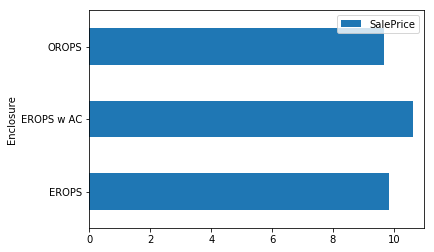

In [59]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

#### Add Error bars. Will tell us if we are not confident

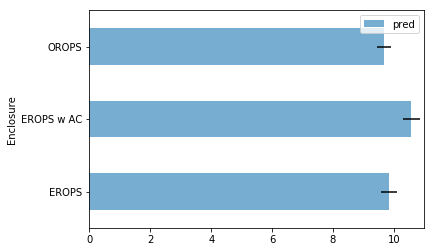

In [60]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

#### Add to Product size - consider

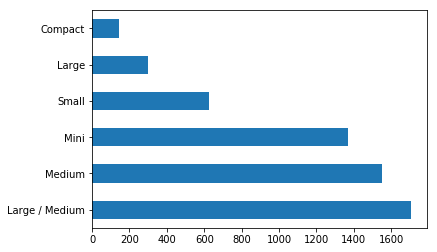

In [61]:
raw_valid.ProductSize.value_counts().plot.barh();

We see that we have some big intervals for **compact** and for **large** and if we look at the chart above, its probably because the dataset size is too small.

In [62]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.849076,0.334910
Large,10.470589,10.389998,0.359176
Large / Medium,10.691871,10.658287,0.299063
Medium,10.681511,10.627427,0.287277
Mini,9.535147,9.562571,0.251085
Small,10.324448,10.318753,0.318815


### Look at a ratio std vs. the actual prediction

In [63]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.034569
Compact           0.034004
Small             0.030897
Large / Medium    0.028059
Medium            0.027032
Mini              0.026257
dtype: float64

### Feature Importance

It's not normally enough to just to know that a model can make accurate predictions - we also want to know *how* it's making predictions. The most important way to see this is with *feature importance*.

In [64]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.171893
37,Coupler_System,0.095873
13,ProductSize,0.089217
14,fiProductClassDesc,0.082386
39,Hydraulics_Flow,0.059927
2,ModelID,0.059114
63,saleElapsed,0.050549
10,fiSecondaryDesc,0.043213
38,Grouser_Tracks,0.040982
19,Enclosure,0.040818


In [65]:
??rf_feat_importance

This function is a simple wrapper around the standard SKLEARN model objects. Most of the classifications have `.feature_importance_` as a standard attribute of the model objects

```python
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
```

#### Plot the distribution of importance across different features

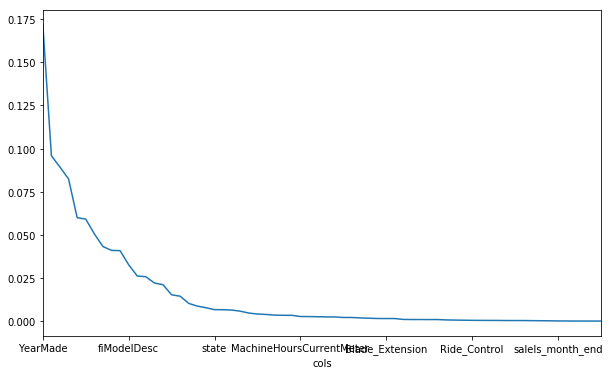

In [68]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [69]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

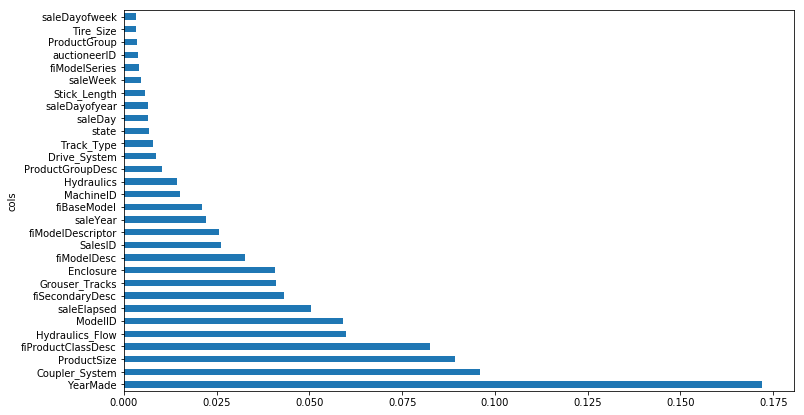

In [70]:
plot_fi(fi[:30]);

### How to interpret?

1. **Review data w/ experts:** Sit with the client and the data dictionary and go through each of the top features. 

2. **If client says 'that makes no sense' **: doesn't mean anything. It may just mean that there's a miscommunication in the data. Either in what was provided, or even all the way back to when it was recorded. Sometimes the default value may be misleading. 

3. **data leakage** : that back at time t1, they wouldn't have all the data that we have looking back.

### What next?

- try throwing some data away and see if that matters

#### Keep only 'important' features and make a smaller dataframe

In [72]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

#### Re-run the model to see how stable the feature importance is

In [73]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [74]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20690392074364916, 0.24477691611214772, 0.9105310651527877, 0.89299873999387613, 0.89417513895254686]


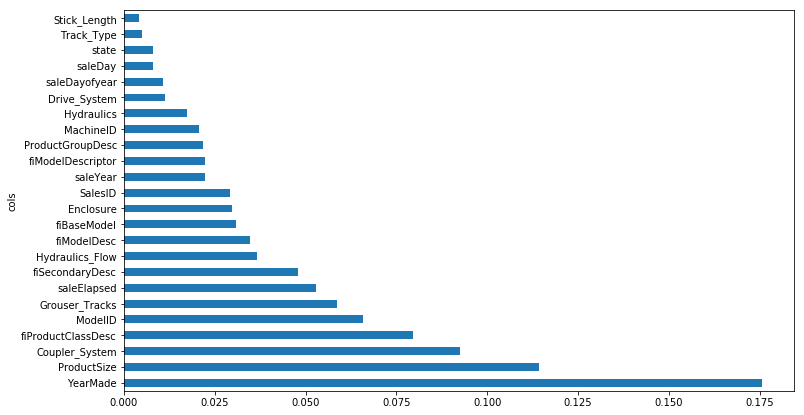

In [75]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

### Interpretation

When you limited top importance. You may have removed collinearity, then you may be consolidated some of the feature importance and 'clear up' the feature importance (have a clear picture). 

- We see year made now looks much much more important than in the previous graph

### How can you verify the feature importance? Decoupled Shuffling

Take our dataset that we are trying to predict which is price. We have all the independent variables. In this case we had 25 different variables.

How do we figure out how important `year_made` is?

1. **run 25 baseline** We run the model of the top25, and consider it baseline. Keep the model the same, then re-run predict with the following steps.
2.  **Shuffle within col** Lets take the `year made` column and randomly shuffle (vertically, and decouple from rows)
3. **Compare scores** Compare the scores between the baseline + re-shuffled version
4. **Shuffle other cols and note change in score** Do the same with the other top features and note the decrease in score. 